# Bigmart sales prediction

Aim: To build a predictive model and find out the sales of each product at a particular store.

# Variable ->	Description

Item_Identifier ->	Unique product ID

Item_Weight	-> Weight of product

Item_Fat_Content ->	Whether the product is low fat or not

Item_Visibility	-> The % of total display area of all products in a store allocated to the particular product

Item_Type -> The category to which the product belongs

Item_MRP -> Maximum Retail Price (list price) of the product

Outlet_Identifier -> Unique store ID

Outlet_Establishment_Year -> The year in which store was established

Outlet_Size	-> The size of the store in terms of ground area covered

Outlet_Location_Type ->	The type of city in which the store is located

Outlet_Type	-> Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales -> Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df=pd.read_csv('Train.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Handling Missing Values

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.fillna('NaN',inplace=True)

In [9]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.65,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [10]:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Weight',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Weight
NaN      1463
12.15      86
17.6       82
13.65      77
11.8       76
         ... 
8.67        2
9.42        1
6.52        1
7.685       1
5.4         1
Name: Item_Weight, Length: 416, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3

In [13]:
df['Item_Weight'].value_counts()

NaN      1463
12.15      86
17.6       82
13.65      77
11.8       76
         ... 
8.67        2
9.42        1
6.52        1
7.685       1
5.4         1
Name: Item_Weight, Length: 416, dtype: int64

In [14]:
df['Item_Weight']=df['Item_Weight'].astype('float')

In [15]:
mean_weight=df['Item_Weight'].mean()
print('Mean of item weight:',mean_weight)
df['Item_Weight'].fillna(mean_weight,inplace=True)
df['Item_Weight'].value_counts()

Mean of item weight: 12.857645184136183


12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
5.735000        2
7.685000        1
9.420000        1
5.400000        1
6.520000        1
Name: Item_Weight, Length: 416, dtype: int64

In [16]:
df['Item_Weight'].isnull().sum()

0

In [17]:
df.duplicated().sum()

0

In [18]:
#df.drop(['Outlet_Location_Type','Item_Fat_Content'],axis=1,inplace=True)

In [19]:
#df.drop(['Item_Visibility','Outlet_Size'],axis=1,inplace=True)

In [20]:
#df['Item_Type'].value_counts()

In [21]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [22]:
#df['Outlet_Type'].value_counts()

In [23]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [24]:
#df['Item_Fat_Content'].value_counts()

In [25]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [26]:
(df['Item_Visibility']==0).sum()

526

In [27]:
df['Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace=True)
(df['Item_Visibility']==0).sum()

0

In [28]:
df['Item_MRP'].isnull().sum()

0

In [29]:
df['Outlet_Size'].replace('NaN','Medium',inplace=True)
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
df['new_item_type']=df['Item_Identifier'].apply(lambda x:x[:2])
df['new_item_type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: new_item_type, Length: 8523, dtype: object

In [32]:
df['new_item_type']=df['new_item_type'].map({'FD':'Food','DR':'Drinks','NC':'Non-Consumable'})
df['new_item_type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: new_item_type, dtype: int64

In [33]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [34]:
df['Outlet_year']=2022-df['Outlet_Establishment_Year']
df['Outlet_year'].value_counts()

37    1463
35     932
25     930
18     930
23     930
20     929
13     928
15     926
24     555
Name: Outlet_year, dtype: int64

In [35]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_item_type,Outlet_year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,23
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,24
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,35


# Remove Outliers

In [36]:
import seaborn as sns


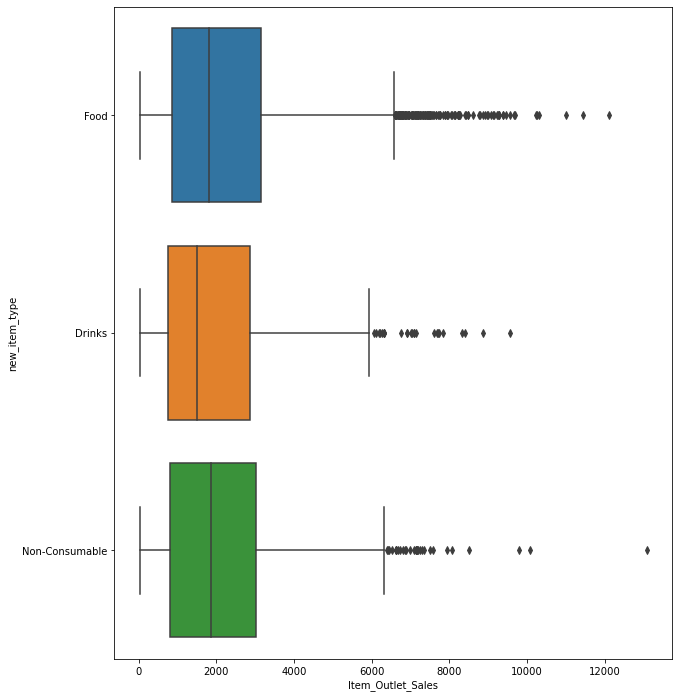

In [37]:
plt.figure(figsize=(10,12))
sns.boxplot(data=df,x='Item_Outlet_Sales',y='new_item_type')
plt.show()

In [38]:
df[(df['new_item_type']=='Non-Consumable') & (df['Item_Outlet_Sales']>6200)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_item_type,Outlet_year
132,NCR53,12.857645,Low Fat,0.144338,Health and Hygiene,224.4404,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976.2524,Non-Consumable,37
240,NCR38,17.250000,Low Fat,0.113749,Household,251.3724,OUT045,2002,Medium,Tier 2,Supermarket Type1,6795.1548,Non-Consumable,20
424,NCU41,18.850000,Low Fat,0.052136,Health and Hygiene,190.1846,OUT049,1999,Medium,Tier 1,Supermarket Type1,6687.9610,Non-Consumable,23
1092,NCB43,12.857645,Low Fat,0.099428,Household,187.8898,OUT027,1985,Medium,Tier 3,Supermarket Type3,7296.5022,Non-Consumable,37
1127,NCM05,12.857645,Low Fat,0.059557,Health and Hygiene,263.7226,OUT027,1985,Medium,Tier 3,Supermarket Type3,6872.3876,Non-Consumable,37
1650,NCU54,8.880000,Low Fat,0.098776,Household,208.9270,OUT049,1999,Medium,Tier 1,Supermarket Type1,7130.7180,Non-Consumable,23
1835,NCL42,18.850000,Low Fat,0.040338,Household,246.7144,OUT013,1987,High,Tier 3,Supermarket Type1,6615.3888,Non-Consumable,35
1987,NCV06,12.857645,Low Fat,0.066358,Household,195.2478,OUT027,1985,Medium,Tier 3,Supermarket Type3,7168.6686,Non-Consumable,37
2282,NCX30,16.700000,Low Fat,0.026729,Household,248.4776,OUT018,2009,Medium,Tier 3,Supermarket Type2,6439.6176,Non-Consumable,13
2687,NCL53,12.857645,Low Fat,0.066132,Health and Hygiene,175.4028,OUT027,1985,Medium,Tier 3,Supermarket Type3,6729.9064,Non-Consumable,37


In [39]:
df.drop([132,240,424,1092,1127,1650,1835,1987,2282,2687,2830,2922,3234,3321,3407,3720,3863,4289,4568,4991,5351,5558,5866,6050,6484,7016,7118,7188,7191,7236,7595,7796,7926,8329,8350],inplace=True)

In [40]:
df[(df['new_item_type']=='Drinks') & (df['Item_Outlet_Sales']>6000)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_item_type,Outlet_year
304,DRE60,9.395000,Low Fat,0.159658,Soft Drinks,224.9720,OUT045,2002,Medium,Tier 2,Supermarket Type1,7696.6480,Drinks,20
915,DRE60,9.395000,Low Fat,0.159582,Soft Drinks,224.7720,OUT049,1999,Medium,Tier 1,Supermarket Type1,7017.5320,Drinks,23
1043,DRF23,12.857645,Low Fat,0.122058,Hard Drinks,172.8396,OUT027,1985,Medium,Tier 3,Supermarket Type3,7152.0236,Drinks,37
1393,DRM37,12.857645,Low Fat,0.095931,Soft Drinks,198.5768,OUT027,1985,Medium,Tier 3,Supermarket Type3,6897.6880,Drinks,37
1879,DRG49,7.810000,Low Fat,0.067592,Soft Drinks,246.0486,OUT045,2002,Medium,Tier 2,Supermarket Type1,7086.1094,Drinks,20
1996,DRJ47,12.857645,Low Fat,0.044036,Hard Drinks,173.3080,OUT027,1985,Medium,Tier 3,Supermarket Type3,6751.2120,Drinks,37
2040,DRL01,19.500000,Regular,0.077292,Soft Drinks,235.3958,OUT049,1999,Medium,Tier 1,Supermarket Type1,6309.7866,Drinks,23
2891,DRM47,9.300000,Low Fat,0.043777,Hard Drinks,192.9846,OUT035,2004,Small,Tier 2,Supermarket Type1,6114.7072,Drinks,18
3087,DRK23,8.395000,Low Fat,0.071917,Hard Drinks,254.8040,OUT013,1987,High,Tier 3,Supermarket Type1,7843.1240,Drinks,35
4676,DRE49,12.857645,Low Fat,0.066132,Soft Drinks,153.8024,OUT027,1985,Medium,Tier 3,Supermarket Type3,7741.9224,Drinks,37


In [41]:
df.drop([485,7620,7459,7256,6932,6745,6606,6057,5969,5619,5550,5474,5444,5315,4772,4676,3087,2891,2040,1996,1879,1393,1043,915,304],inplace=True)

In [42]:
df[(df['new_item_type']=='Food') & (df['Item_Outlet_Sales']>6300)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_item_type,Outlet_year
43,FDC02,21.350000,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228,Food,13
130,FDY25,12.857645,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944,Food,37
145,FDP16,18.600000,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060,Food,23
146,FDB11,16.000000,Low Fat,0.060837,Starchy Foods,226.8404,OUT035,2004,Small,Tier 2,Supermarket Type1,6301.1312,Food,18
203,FDI24,12.857645,Low Fat,0.078362,Baking Goods,177.9370,OUT027,1985,Medium,Tier 3,Supermarket Type3,6704.6060,Food,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8201,FDO03,12.857645,Regular,0.036704,Meat,228.1352,OUT027,1985,Medium,Tier 3,Supermarket Type3,9390.4432,Food,37
8208,FDM20,10.000000,Low Fat,0.038905,Fruits and Vegetables,245.4144,OUT017,2007,Medium,Tier 2,Supermarket Type1,6615.3888,Food,15
8245,FDU55,16.200000,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.5062,Food,23
8447,FDS26,20.350000,Low Fat,0.089975,Dairy,261.6594,OUT017,2007,Medium,Tier 2,Supermarket Type1,7588.1226,Food,15


In [43]:
df.drop([43,130,145,146,203,8201,8208,8245,8447,8510],inplace=True)

In [44]:
df[(df['new_item_type']=='Food') & (df['Item_Outlet_Sales']>6300)]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_item_type,Outlet_year
243,FDY56,16.350000,Regular,0.062764,Fruits and Vegetables,227.6062,OUT017,2007,Medium,Tier 2,Supermarket Type1,7222.5984,Food,15
275,FDH19,12.857645,Low Fat,0.032928,Meat,173.1738,OUT027,1985,Medium,Tier 3,Supermarket Type3,7298.4996,Food,37
276,FDY55,16.750000,Low Fat,0.081253,Fruits and Vegetables,256.4988,OUT013,1987,High,Tier 3,Supermarket Type1,7452.9652,Food,35
333,FDN58,12.857645,Regular,0.056597,Snack Foods,230.9984,OUT027,1985,Medium,Tier 3,Supermarket Type3,9267.9360,Food,37
337,FDQ07,15.100000,Regular,0.087584,Fruits and Vegetables,221.7456,OUT045,2002,Medium,Tier 2,Supermarket Type1,6410.3224,Food,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,FDQ24,15.700000,Low Fat,0.074083,Baking Goods,253.3724,OUT017,2007,Medium,Tier 2,Supermarket Type1,6795.1548,Food,15
7967,FDR16,5.845000,Regular,0.104998,Frozen Foods,213.2218,OUT035,2004,Small,Tier 2,Supermarket Type1,7266.5412,Food,18
7981,FDY34,12.857645,Regular,0.010929,Snack Foods,167.0842,OUT027,1985,Medium,Tier 3,Supermarket Type3,6465.5838,Food,37
8039,FDY55,16.750000,Low Fat,0.081485,Fruits and Vegetables,258.0988,OUT045,2002,Medium,Tier 2,Supermarket Type1,8994.9580,Food,20


In [45]:
df.drop([243,275,276,333,337,7956,7967,7981,8039,8113],inplace=True)

In [46]:
df[(df['new_item_type']=='Food') & (df['Item_Outlet_Sales']>6300)]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_item_type,Outlet_year
373,FDX09,9.000000,Low Fat,0.065237,Snack Foods,176.4370,OUT035,2004,Small,Tier 2,Supermarket Type1,7763.2280,Food,18
402,FDT59,13.650000,Low Fat,0.015908,Breads,231.1668,OUT035,2004,Small,Tier 2,Supermarket Type1,6911.0040,Food,18
456,FDS26,12.857645,Low Fat,0.089036,Dairy,260.5594,OUT027,1985,Medium,Tier 3,Supermarket Type3,9158.0790,Food,37
472,FDU56,12.857645,Low Fat,0.066132,Fruits and Vegetables,184.7266,OUT027,1985,Medium,Tier 3,Supermarket Type3,8114.7704,Food,37
497,FDR56,12.857645,Regular,0.100278,Fruits and Vegetables,196.8768,OUT027,1985,Medium,Tier 3,Supermarket Type3,7094.7648,Food,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7752,FDC17,12.857645,Low Fat,0.015386,Frozen Foods,208.9928,OUT027,1985,Medium,Tier 3,Supermarket Type3,9678.0688,Food,37
7816,FDV45,12.857645,Low Fat,0.044829,Snack Foods,187.4556,OUT027,1985,Medium,Tier 3,Supermarket Type3,7510.2240,Food,37
7826,FDM39,12.857645,Low Fat,0.053212,Dairy,177.6002,OUT027,1985,Medium,Tier 3,Supermarket Type3,8417.7094,Food,37
7864,FDV57,15.250000,Regular,0.066269,Snack Foods,179.6660,OUT017,2007,Medium,Tier 2,Supermarket Type1,6471.5760,Food,15


In [47]:
df.drop([373,402,456,472,497,640,641,661,694,753,809,844,903,935,991,997,1009,1012,1040,1113,1138,1254,
         1348,1450,1506,1565,1601,1611,1627,1658,1700,1705,1709,1710,1751,1821,1859,1998,2109,2216,2238,
        2293,2516,2528,2535,2549,2589,2599,2615,2648,2680,2776,2803,2887,3033,3073,3083,3098,3154,3208,3213,3255,
        3286,3400,3494,3498,3584,3590,3636,3667,3670,3709,3757,3848,3869,3894,3903,3979,3999,4094,4150,4305,4346,4349,4378,4410,
        4468,4598,4681,4683,4699,4888,4891,4913,4915,4961,5065,5177,5185,5223,5225,5236,5292,5413,5416,5463,5494,5500,5752,5775,
        5799,5800,5812,5920,5977,6000,6092,6134,6169,6189,6334,6409,6513,6537,6541,6568,6569,6696,6765,6796,6886,6906,6993,
         7014,7076,7149,7164,7302,7343,7539,7560,7562,7609,7690,7737,7752,7816,7826,7864,7930],inplace=True)

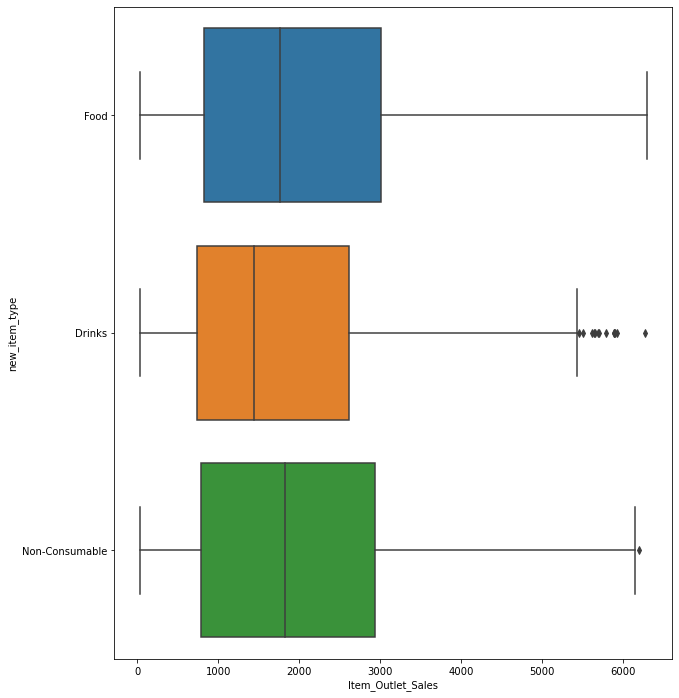

In [48]:
plt.figure(figsize=(10,12))
sns.boxplot(data=df,x='Item_Outlet_Sales',y='new_item_type')
plt.show()

In [49]:
df[(df['new_item_type']=='Drinks') & (df['Item_Outlet_Sales']>5300)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_item_type,Outlet_year
165,DRL01,19.500000,Regular,0.077609,Soft Drinks,233.4958,OUT017,2007,Medium,Tier 2,Supermarket Type1,5375.0034,Drinks,15
211,DRC27,13.800000,Low Fat,0.058091,Dairy,245.1802,OUT035,2004,Small,Tier 2,Supermarket Type1,5650.6446,Drinks,18
320,DRQ35,12.857645,Low Fat,0.042087,Hard Drinks,122.4388,OUT027,1985,Medium,Tier 3,Supermarket Type3,5448.9072,Drinks,37
599,DRK37,5.000000,Low Fat,0.044005,Soft Drinks,188.8530,OUT046,1997,Small,Tier 1,Supermarket Type1,5502.8370,Drinks,25
829,DRJ24,11.800000,Low Fat,0.113235,Soft Drinks,186.3924,OUT013,1987,High,Tier 3,Supermarket Type1,5367.6796,Drinks,35
1084,DRC36,12.857645,Regular,0.044767,Soft Drinks,173.7054,OUT027,1985,Medium,Tier 3,Supermarket Type3,5778.4782,Drinks,37
1103,DRF36,16.100000,Low Fat,0.023673,Soft Drinks,189.0846,OUT018,2009,Medium,Tier 3,Supermarket Type2,5350.3688,Drinks,13
1373,DRI13,15.350000,Low Fat,0.020442,Soft Drinks,216.4508,OUT017,2007,Medium,Tier 2,Supermarket Type1,5426.2700,Drinks,15
1667,DRL01,19.500000,Regular,0.077108,Soft Drinks,232.8958,OUT013,1987,High,Tier 3,Supermarket Type1,5608.6992,Drinks,35
1960,DRF36,16.100000,Low Fat,0.023614,Soft Drinks,192.8846,OUT049,1999,Medium,Tier 1,Supermarket Type1,5350.3688,Drinks,23


In [50]:
df.drop([165,211,320,599,829,1084,1103,1373,1667,1960,3009,3027,3595,4481,4730,6688,6931,7261,8485],inplace=True),

(None,)

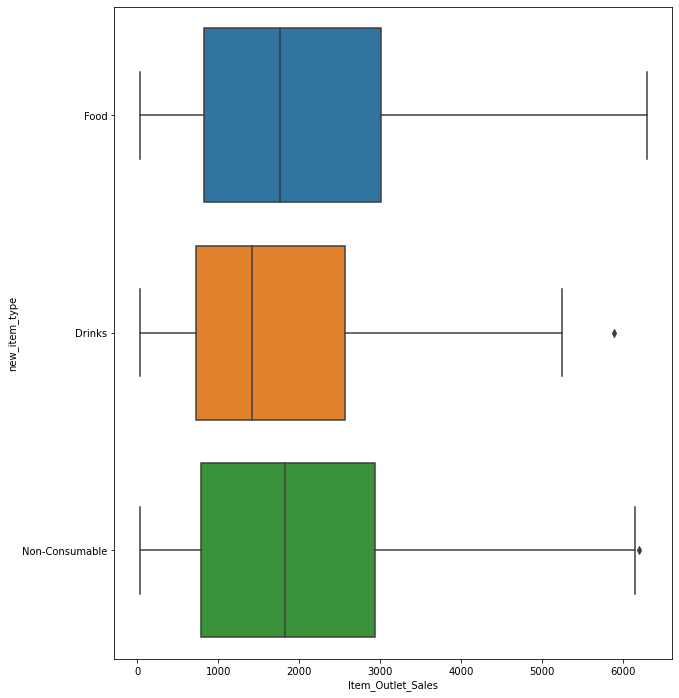

In [51]:
plt.figure(figsize=(10,12))
sns.boxplot(data=df,x='Item_Outlet_Sales',y='new_item_type')
plt.show()

# Skewness

0.7449239064633996

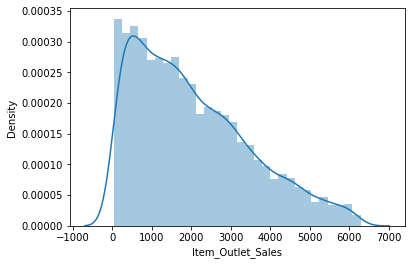

In [52]:
from scipy.stats import skew
sns.distplot(df['Item_Outlet_Sales'])
skew(df['Item_Outlet_Sales'])

1.281313558186972

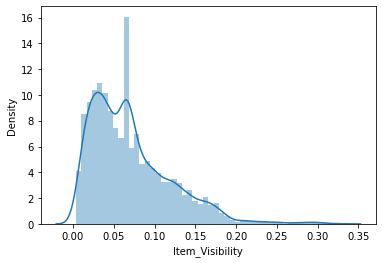

In [53]:
sns.distplot(df['Item_Visibility'])
skew(df['Item_Visibility'])

0.15737868017874962

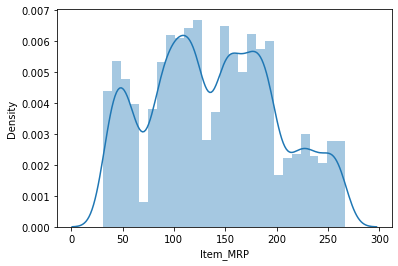

In [54]:
sns.distplot(df['Item_MRP'])
skew(df['Item_MRP'])

0.09071071240417392

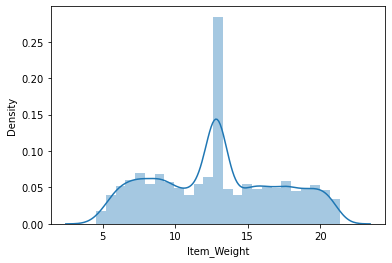

In [55]:
sns.distplot(df['Item_Weight'])
skew(df['Item_Weight'])

In [56]:
#log transformation
#df_num['Item_Outlet_Sales'] = np.log(1+df_num['Item_Outlet_Sales'])
#df_num['Item_Outlet_Sales']

In [57]:
from scipy.stats import skew
df['Item_Outlet_Sales'] = np.sqrt(df['Item_Outlet_Sales'])
skew(df['Item_Outlet_Sales'])

0.03918594909426352

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

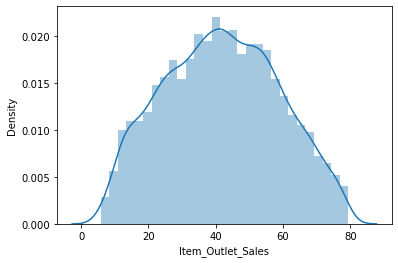

In [58]:
sns.distplot(df['Item_Outlet_Sales'])

In [59]:
df['Item_Visibility'] = np.sqrt(df['Item_Visibility'])

In [60]:
skew(df['Item_Visibility'])

0.40377612678252595

In [61]:
#df_num['Item_Visibility'] = np.log(1+df_num['Item_Visibility'])
#df_num['Item_Visibility']

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

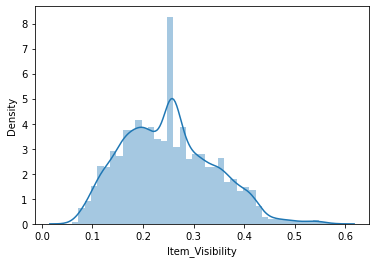

In [62]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

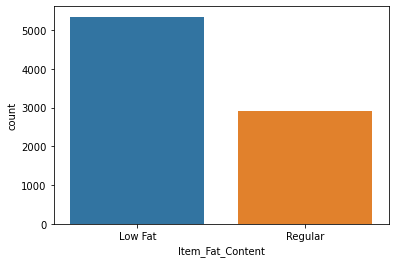

In [63]:
sns.countplot(df["Item_Fat_Content"])

most items are low fat content

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

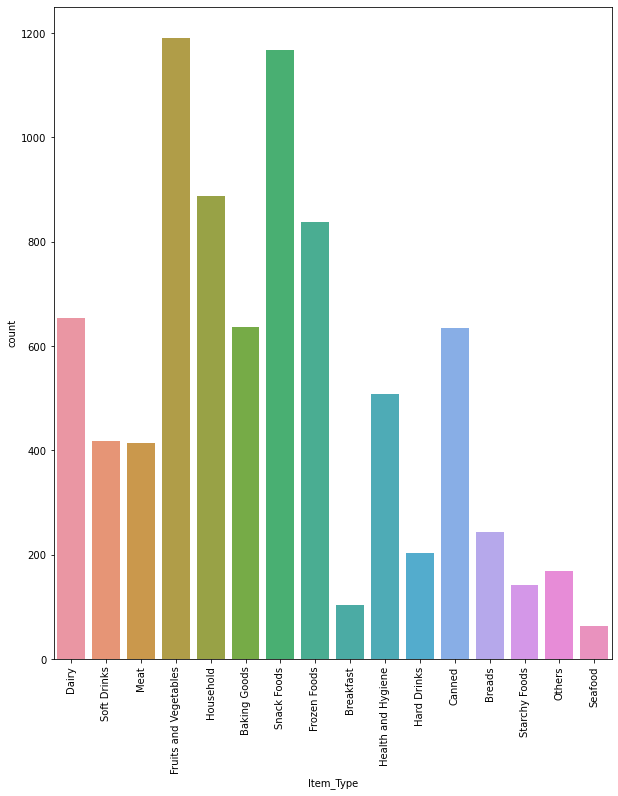

In [64]:
plt.figure(figsize=(10,12))
l1= list(df['Item_Type'].unique())
chart = sns.countplot(df["Item_Type"])
chart.set_xticklabels(labels=l1, rotation=90)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

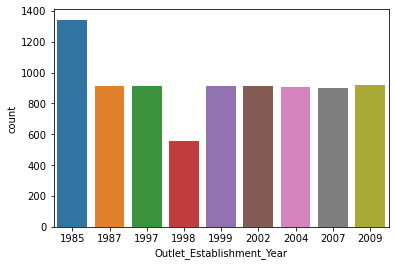

In [65]:
sns.countplot(df['Outlet_Establishment_Year'])

most outlets are established in an equal distribution.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

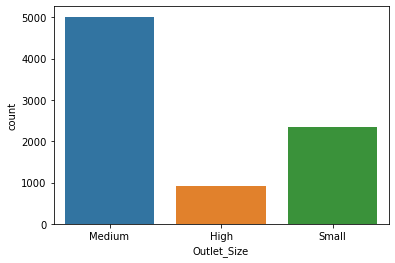

In [66]:
sns.countplot(df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

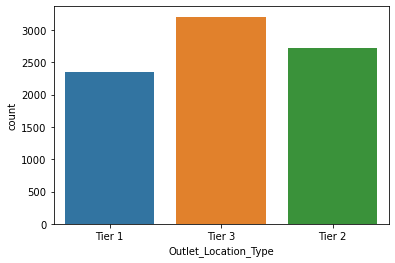

In [67]:
sns.countplot(df['Outlet_Location_Type'])

[Text(0, 0, 'Supermarket Type1'),
 Text(1, 0, 'Supermarket Type2'),
 Text(2, 0, 'Grocery Store'),
 Text(3, 0, 'Supermarket Type3')]

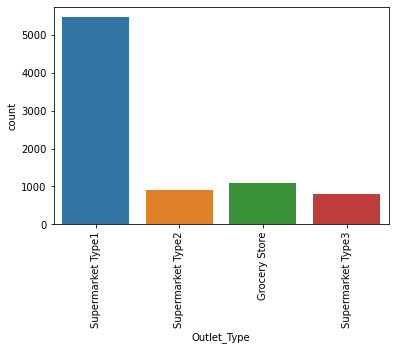

In [68]:
l2= list(df['Outlet_Type'].unique())
chart=sns.countplot(df['Outlet_Type'])
chart.set_xticklabels(labels=l2, rotation=90)


In [69]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_item_type,Outlet_year
0,FDA15,9.30,Low Fat,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,61.115775,Food,23
1,DRC01,5.92,Regular,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,21.057607,Drinks,13
2,FDN15,17.50,Low Fat,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,45.795961,Food,23
3,FDX07,19.20,Regular,0.257161,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,27.062520,Food,24
4,NCD19,8.93,Low Fat,0.257161,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,31.538947,Non-Consumable,35


# Feature Engineering

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
#le=LabelEncoder()
#df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
#cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'new_item_type']
#for col in cat_col:
  #  df[col] = le.fit_transform(df[col])

In [72]:
#df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'new_item_type'])
#df.head()

In [73]:
le=LabelEncoder()
#df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
#cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'new_item_type']
data_encoding=df.select_dtypes(include='object').columns
data_encoding

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'new_item_type'],
      dtype='object')

In [74]:
for i in data_encoding:
    df[i]=le.fit_transform(df[i])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_item_type,Outlet_year
0,156,9.30,0,0.126678,4,249.8092,9,1999,1,0,1,61.115775,1,23
1,8,5.92,1,0.138846,14,48.2692,3,2009,1,2,2,21.057607,0,13
2,662,17.50,0,0.129461,10,141.6180,9,1999,1,0,1,45.795961,1,23
3,1121,19.20,1,0.257161,6,182.0950,0,1998,1,2,0,27.062520,1,24
4,1297,8.93,0,0.257161,9,53.8614,1,1987,0,2,1,31.538947,2,35


In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
col=['Item_Identifier','Item_Weight', 'Item_Fat_Content','Item_Visibility', 'Item_Type','Item_MRP', 'Outlet_Identifier','Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'new_item_type','Outlet_year']
df2=df[col]
scaler=MinMaxScaler()
df2[:]=scaler.fit_transform(df2[:])
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,new_item_type,Outlet_year
0,0.100128,0.282525,0.0,0.130321,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.5,0.416667
1,0.005135,0.081274,1.0,0.154028,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.0,0.000000
2,0.424904,0.770765,0.0,0.135743,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.5,0.416667
3,0.719512,0.871986,1.0,0.384543,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,0.5,0.458333
4,0.832478,0.260494,0.0,0.384543,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,1.0,0.916667


# spliting the data into training and testing

In [77]:
x = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

# logistic regression 

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=10)

In [79]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (4964, 10)
y_train shape: (4964,)
x_test shape: (3310, 10)
y_test shape: (3310,)


In [80]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(fit_intercept=True)

In [81]:
%time
lr_model.fit(x_train,y_train)

Wall time: 0 ns


LinearRegression()

In [82]:
print('Intersept : ',lr_model.intercept_)
print('Coeffiescents : ',lr_model.coef_)

Intersept :  29.386960682344466
Coeffiescents :  [ -0.03272224   0.61807572 -11.4532219   -0.02691976   0.15026505
  -6.06698578  -6.68695424  11.97041485   0.62898076  -0.23046004]


In [83]:
x_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'new_item_type', 'Outlet_year'],
      dtype='object')

In [84]:
pd.DataFrame((lr_model.coef_).T,index=[x_train.columns],columns=['Co-efficents'])

,Co-efficents
Item_Weight,-0.032722
Item_Fat_Content,0.618076
Item_Visibility,-11.453222
Item_Type,-0.026920
Item_MRP,0.150265
Outlet_Size,-6.066986
Outlet_Location_Type,-6.686954
Outlet_Type,11.970415
new_item_type,0.628981
Outlet_year,-0.230460


In [85]:
y_train_predictions = lr_model.predict(x_train)

In [86]:
 y_train_predictions[0:5]

array([31.62053423, 32.09448973, 38.63547475, 67.10319519, 56.30703985])

In [87]:
y_test_predictions = lr_model.predict(x_test)  
y_test_predictions   # predict value

array([34.85461937, 35.29825524, 25.14026179, ..., 34.84279614,
       35.69356958, 50.64964736])

In [88]:
#compare actual and prediction
print ('Prediction value:',y_test_predictions[0:5])
print ('Actual value:',y_test[0:5])


Prediction value: [34.85461937 35.29825524 25.14026179 62.79453032 46.39201789]
Actual value: 3839    26.515746
7351    24.356268
6828    21.418128
2896    68.541118
3754    53.723766
Name: Item_Outlet_Sales, dtype: float64


In [89]:
from sklearn import metrics

In [90]:
MAE_Train = metrics.mean_absolute_error(y_train,y_train_predictions)
MAE_test = metrics.mean_absolute_error(y_test,y_test_predictions)

In [91]:
MAE_test

9.101614624658648

In [92]:
MAE_Train

9.319346657893277

In [93]:
metrics.mean_squared_error(y_train,y_train_predictions)

135.46679174392662

In [94]:
metrics.mean_squared_error(y_test,y_test_predictions)

130.39345033424001

In [95]:
np.sqrt(metrics.mean_squared_error(y_train,y_train_predictions))

11.639020222678823

In [96]:
np.sqrt(metrics.mean_squared_error(y_test,y_test_predictions))

11.418995154313711

In [97]:
linear_reg_accuracy_train = round(lr_model.score(x_train,y_train)*100)
linear_reg_accuracy_train

54

In [98]:
linear_reg_accuracy_test = round(lr_model.score(x_test,y_test)*100)
linear_reg_accuracy_test

55

# Decision Tree 

In [99]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=15)

In [101]:
from sklearn.tree import DecisionTreeRegressor

In [102]:
decision_tree=DecisionTreeRegressor(max_depth=50,random_state=15,criterion='mse')
decision_tree

DecisionTreeRegressor(max_depth=50, random_state=15)

In [103]:
decision_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=50, random_state=15)

In [104]:
pred=decision_tree.predict(x_test)
pred

array([13.75089815, 43.21537921, 63.5825259 , ..., 12.95305369,
       59.86096892, 10.97769557])

In [105]:
print (pred [0:5])
print (y_test [0:5])

[13.75089815 43.21537921 63.5825259  48.95794113 60.25452182]
2586    11.824466
4849    57.018430
7455    54.094279
3112    29.779953
2618    45.846817
Name: Item_Outlet_Sales, dtype: float64


In [106]:

print("DecisionTrees's Accuracy: ", mean_squared_error(y_test,pred))

DecisionTrees's Accuracy:  201.95689458315957


In [107]:
tree_accuracy_train = round(decision_tree.score(x_train,y_train)*100)
tree_accuracy_train

100

In [108]:
tree_accuracy_test = round(decision_tree.score(x_test,y_test)*100)
tree_accuracy_test

29

# Graph betweeen prediction & Mean Squared Error

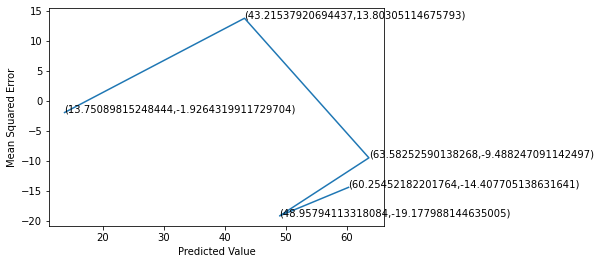

In [109]:
x=pred[0:5]
error=y_test - pred
y=error[0:5]
#plt.plot(x,y)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.plot(x,y)
for i,j in zip(x,y):
    plt.text(i,j,"({},{})".format(i,j))
plt.show()

# Random Forest Regressor

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
random_forest=RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,random_state=10)
random_forest

RandomForestRegressor(max_depth=6, min_samples_leaf=100, n_estimators=400,
                      random_state=10)

In [112]:
random_forest.fit(x_train,y_train)


RandomForestRegressor(max_depth=6, min_samples_leaf=100, n_estimators=400,
                      random_state=10)

In [113]:
rf_pred=random_forest.predict(x_test)
rf_pred

array([12.07446142, 52.00656541, 55.69931702, ..., 12.07446142,
       48.64791026, 15.56989136])

In [114]:
print(rf_pred[0:10])
print(y_test[0:10])

[12.07446142 52.00656541 55.69931702 38.78235228 53.99251945 17.08227783
 12.07446142 58.87525974 29.92120867 61.69941739]
2586    11.824466
4849    57.018430
7455    54.094279
3112    29.779953
2618    45.846817
1268    12.157615
6644     7.113424
639     75.739902
7954    37.204814
2838    77.615452
Name: Item_Outlet_Sales, dtype: float64


In [115]:
MSE=mean_squared_error(y_test,rf_pred)
print("Random Forest Accuracy: ", MSE)

Random Forest Accuracy:  100.19565127807621


In [116]:
rf_accuracy_train = round(random_forest.score(x_train,y_train)*100)
rf_accuracy_train

67

In [117]:
rf_accuracy_test = round(random_forest.score(x_test,y_test)*100)
rf_accuracy_test

65

# Graph betweeen prediction & Mean Squared Error

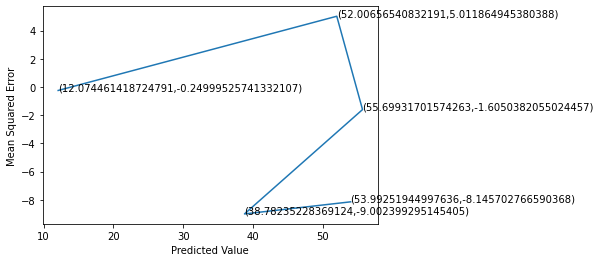

In [118]:
x=rf_pred[0:5]
error=y_test - rf_pred
y=error[0:5]
#plt.plot(x,y)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.plot(x,y)
for i,j in zip(x,y):
    plt.text(i,j,"({},{})".format(i,j))
plt.show()



# Boosting Algorithm

In [119]:
from xgboost import XGBRegressor

In [120]:
xgb_reg=XGBRegressor(n_estimators=100,max_depth=50,learning_rate=0.05)
xgb_reg.fit(x_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=50, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [121]:
pred=xgb_reg.predict(x_test)
pred

array([ 9.899748, 48.640945, 58.700405, ..., 15.422053, 49.897125,
       17.581985], dtype=float32)

In [122]:
print(pred[0:10])
print(y_test[0:10])

[ 9.899748 48.640945 58.700405 42.747585 59.039013 17.89542   9.041263
 53.100376 28.593185 72.39008 ]
2586    11.824466
4849    57.018430
7455    54.094279
3112    29.779953
2618    45.846817
1268    12.157615
6644     7.113424
639     75.739902
7954    37.204814
2838    77.615452
Name: Item_Outlet_Sales, dtype: float64


In [123]:
MSE=mean_squared_error(y_test,pred)
print("Accuracy of XGB boosting : ", MSE)

Accuracy of XGB boosting :  122.64688601510501


In [124]:
xgb_accuracy_train = round(random_forest.score(x_train,y_train)*100)
xgb_accuracy_train

67